
Training Random Forest...


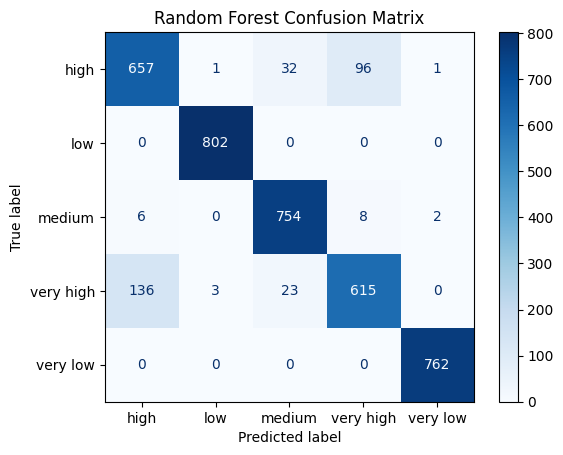

Classification Report for Random Forest:
              precision    recall  f1-score   support

        high       0.82      0.83      0.83       787
         low       1.00      1.00      1.00       802
      medium       0.93      0.98      0.96       770
   very high       0.86      0.79      0.82       777
    very low       1.00      1.00      1.00       762

    accuracy                           0.92      3898
   macro avg       0.92      0.92      0.92      3898
weighted avg       0.92      0.92      0.92      3898

Random Forest F1 Score: 0.92


Training Logistic Regression...


C:\Users\AbdessalemDjoudi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


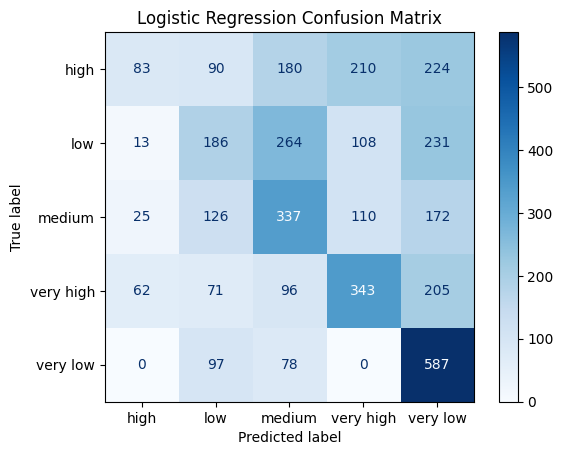

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

        high       0.45      0.11      0.17       787
         low       0.33      0.23      0.27       802
      medium       0.35      0.44      0.39       770
   very high       0.44      0.44      0.44       777
    very low       0.41      0.77      0.54       762

    accuracy                           0.39      3898
   macro avg       0.40      0.40      0.36      3898
weighted avg       0.40      0.39      0.36      3898

Logistic Regression F1 Score: 0.36


Training Gradient Boosting...


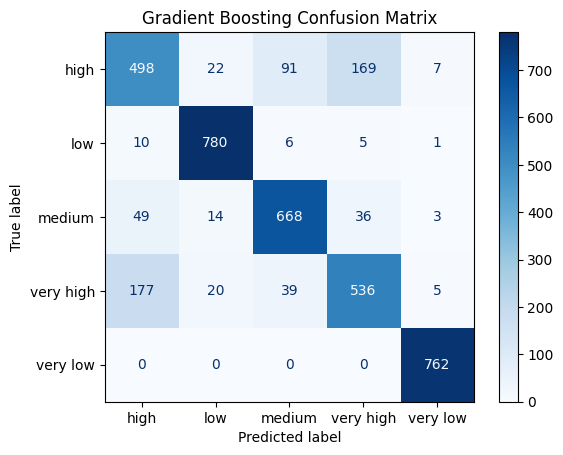

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

        high       0.68      0.63      0.65       787
         low       0.93      0.97      0.95       802
      medium       0.83      0.87      0.85       770
   very high       0.72      0.69      0.70       777
    very low       0.98      1.00      0.99       762

    accuracy                           0.83      3898
   macro avg       0.83      0.83      0.83      3898
weighted avg       0.83      0.83      0.83      3898

Gradient Boosting F1 Score: 0.83


Training XGBoost...


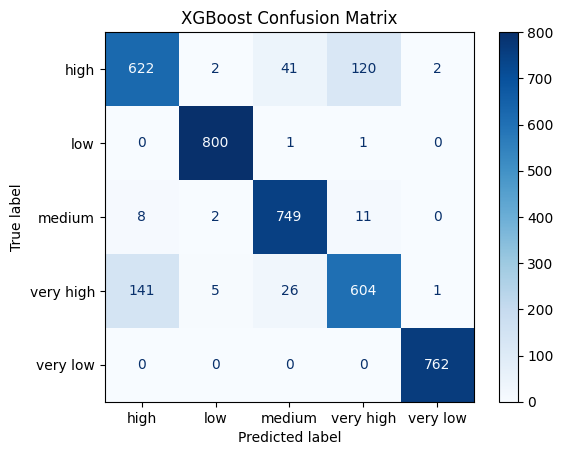

Classification Report for XGBoost:
              precision    recall  f1-score   support

        high       0.81      0.79      0.80       787
         low       0.99      1.00      0.99       802
      medium       0.92      0.97      0.94       770
   very high       0.82      0.78      0.80       777
    very low       1.00      1.00      1.00       762

    accuracy                           0.91      3898
   macro avg       0.91      0.91      0.91      3898
weighted avg       0.91      0.91      0.91      3898

XGBoost F1 Score: 0.91


Training Stacking...


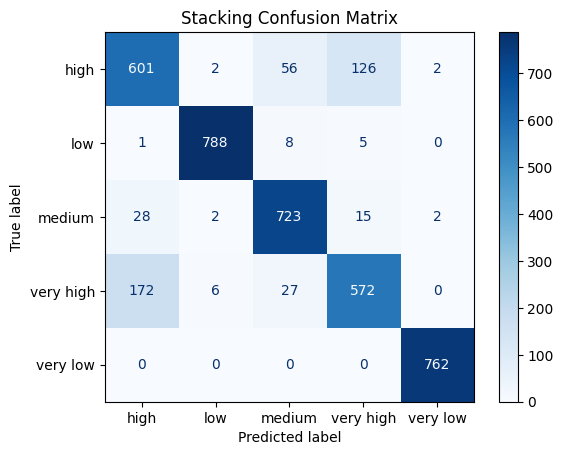

Classification Report for Stacking:
              precision    recall  f1-score   support

        high       0.75      0.76      0.76       787
         low       0.99      0.98      0.98       802
      medium       0.89      0.94      0.91       770
   very high       0.80      0.74      0.77       777
    very low       0.99      1.00      1.00       762

    accuracy                           0.88      3898
   macro avg       0.88      0.88      0.88      3898
weighted avg       0.88      0.88      0.88      3898

Stacking F1 Score: 0.88



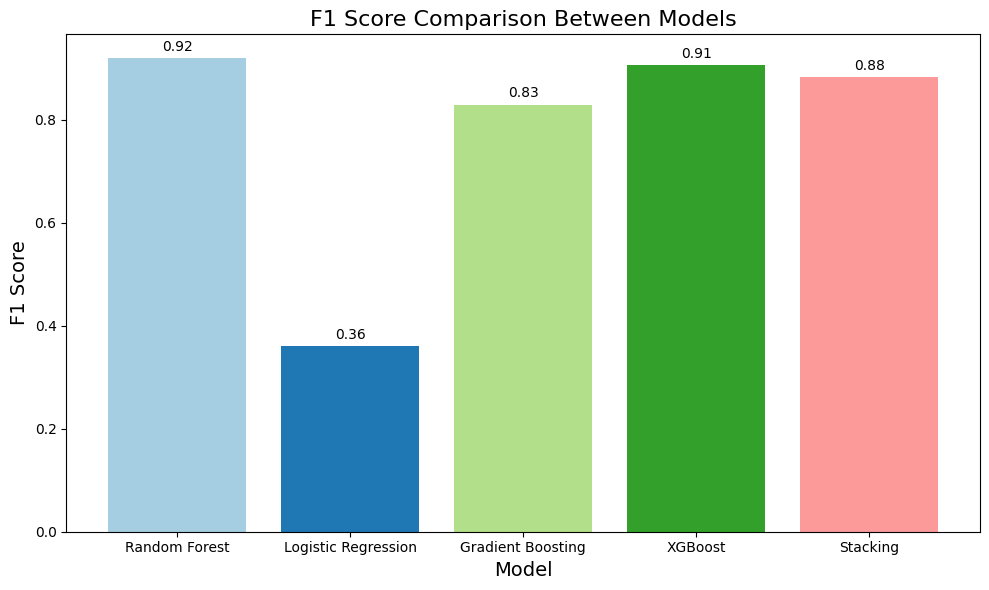

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, f1_score
from imblearn.over_sampling import SMOTE

# Load the dataset
data = pd.read_csv('../data/species.csv')

# Sample 0.1 (10%) of the dataset
#data = data.sample(frac=0.1, random_state=1)

# Drop features based on low importance
features_to_drop = [ 
    'Unnamed: 0', 'Region','Keys_Divisions', 'SG_permits_50km' , 'Population_50km', 'impact','Recreational_fishermen_50km', 
    'Marina_slips_25km','SG_charter_permits_25km','Random', 'Habitat_type_classLV0',  'BNP', 
    'DryTortugas', 'CoralECA', 'FKNMS', 'Marine_reserve', 'Comm_reliance', 
    'Artificial_reefs_1km', 'model', 'Comm_engagement', 'no.divers', 'Total_gravity_intercept',  
    'Habitat_type_classLV2', 'YEAR', 'REGION', "Reef_complexity", "Coral_cover", "Commercial_pounds_landed"
]
data = data.drop(columns=features_to_drop)

# Handle missing values: fill missing numeric values with the median
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    data[col] = data[col].fillna(data[col].median())

# Convert categorical columns to numeric using label encoding
non_numeric_cols = data.select_dtypes(include=['object']).columns
label_encoders = {}
for col in non_numeric_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Ensure 'Diversity_index' is numeric and handle missing values
data['Diversity_index'] = pd.to_numeric(data['Diversity_index'], errors='coerce')
data = data.dropna(subset=['Diversity_index'])

# Convert 'Diversity_index' to categorical labels (5 bins)
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]  # Define 5 bins for diversity index
labels = ['very low', 'low', 'medium', 'high', 'very high']  # 5 categories
data['Diversity_index'] = pd.cut(data['Diversity_index'], bins=bins, labels=labels)

# Drop rows with NaN values in 'Diversity_index' after binning
data = data.dropna(subset=['Diversity_index'])

# Encode 'Diversity_index' to numeric (for classification purposes)
le_diversity = LabelEncoder()
data['Diversity_index'] = le_diversity.fit_transform(data['Diversity_index'])

# Now ensure y is treated as categorical for SMOTE and classification models
y = data['Diversity_index']  # Ensure this is categorical (0, 1, 2, 3, 4 for very low to very high)

# Standardize the features
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Prepare features and target
X = data.drop(columns=['Diversity_index'])

# Check the available feature columns
available_features = ['Depth', 'SST', 'Latitude', 'MAX_HARD_RELIEF']  # Adjust based on actual feature names
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
interaction_terms = poly.fit_transform(data[available_features])

# Combine interaction terms with the original features
X_interaction = np.hstack((X, interaction_terms))

# Dimensionality Reduction with PCA
pca = PCA(n_components=10)  # Reduce the feature space to 10 components
X_pca = pca.fit_transform(X_interaction)

# Handle class imbalance using SMOTE with adjusted k_neighbors parameter
smote = SMOTE(random_state=42, k_neighbors=2)  # Reduce the number of neighbors to avoid the error
X_resampled, y_resampled = smote.fit_resample(X_pca, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

# Function to plot confusion matrix
def plot_confusion_matrix(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=le_diversity.classes_)
    disp.plot(cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()
    return y_pred

# Replace AdaBoost with StackingClassifier
base_models = [
    ('Random Forest', RandomForestClassifier(n_estimators=100, max_depth=10)),
    ('XGBoost', XGBClassifier(n_estimators=100, max_depth=3)),
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators=100, learning_rate=0.01))
]

stacking_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())

# Models with Hyperparameter Tuning
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'Stacking': stacking_model 
}

# Hyperparameter tuning for models
param_grids = {
    'Random Forest': {'n_estimators': [100, 200], 'max_depth': [10, 20]},
    'Logistic Regression': {'C': [0.01, 0.1, 1, 10]},
    'Gradient Boosting': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]},
    'XGBoost': {'n_estimators': [100, 200], 'max_depth': [3, 5]},
    'Stacking': {} 
}

# Evaluate each model with hyperparameter tuning
f1_scores = {}
best_models = {}  

for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    grid_search = GridSearchCV(model, param_grids.get(model_name, {}), cv=3, scoring='f1_weighted', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    best_models[model_name] = best_model  
    y_pred = plot_confusion_matrix(best_model, X_test, y_test, model_name)
    
    # Print classification report
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred, target_names=le_diversity.classes_))
    
    # Calculate F1 Score
    f1 = f1_score(y_test, y_pred, average='weighted')
    f1_scores[model_name] = f1
    print(f"{model_name} F1 Score: {f1:.2f}\n")

# Improved visualization of F1 scores with annotations and color enhancements
plt.figure(figsize=(10, 6))
bars = plt.bar(f1_scores.keys(), f1_scores.values(), color=plt.cm.Paired.colors)

# Annotate each bar with its F1 score
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

# Add labels and title
plt.xlabel('Model', fontsize=14)
plt.ylabel('F1 Score', fontsize=14)
plt.title('F1 Score Comparison Between Models', fontsize=16)
plt.tight_layout()
plt.show()
